In [124]:
# IMPORT LIBARIES AND IMPORT DATASET 

In [125]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
df = pd.read_csv("22days_of_flood.csv")
df.head()

,date,temperature_2m_min,temperature_2m_mean,temperature_2m_max,relative_humidity_2m_min,relative_humidity_2m_mean,relative_humidity_2m_max,dew_point_2m_min,dew_point_2m_mean,dew_point_2m_max,...,diffuse_radiation_max,direct_normal_irradiance_min,direct_normal_irradiance_mean,direct_normal_irradiance_max,terrestrial_radiation_instant_min,terrestrial_radiation_instant_mean,terrestrial_radiation_instant_max,sunshine_duration_min,sunshine_duration_mean,sunshine_duration_max
0,2020-10-06,25.1,26.370833,29.2,81,91.000000,96,24.1,24.770833,26.0,...,333.0,0.0,108.091667,444.2,0.0,392.479167,1251.7,0.0,1151.198333,3600.0
1,2020-10-07,24.4,25.254167,26.1,89,91.833333,94,23.3,23.829167,24.5,...,190.0,0.0,1.933333,27.8,0.0,391.020833,1248.6,0.0,0.000000,0.0
2,2020-10-08,24.3,24.808333,25.1,86,89.750000,94,22.1,23.025000,23.7,...,156.0,0.0,1.312500,15.2,0.0,389.562500,1245.4,0.0,0.000000,0.0
3,2020-10-09,23.5,24.312500,25.2,78,87.500000,92,21.1,22.095833,23.2,...,160.0,0.0,1.554167,8.2,0.0,388.091667,1242.2,0.0,0.000000,0.0
4,2020-10-10,22.4,23.354167,24.5,77,87.083333,93,19.4,21.033333,22.0,...,208.0,0.0,5.312500,29.4,0.0,386.591667,1238.9,0.0,0.000000,0.0


In [127]:
# PREPROCESSING

In [128]:
print(df.shape)
print(df.columns.tolist())

(23, 79)
['date', 'temperature_2m_min', 'temperature_2m_mean', 'temperature_2m_max', 'relative_humidity_2m_min', 'relative_humidity_2m_mean', 'relative_humidity_2m_max', 'dew_point_2m_min', 'dew_point_2m_mean', 'dew_point_2m_max', 'apparent_temperature_min', 'apparent_temperature_mean', 'apparent_temperature_max', 'precipitation_min', 'precipitation_mean', 'precipitation_max', 'rain_min', 'rain_mean', 'rain_max', 'showers_min', 'showers_mean', 'showers_max', 'weather_code_min', 'weather_code_mean', 'weather_code_max', 'pressure_msl_min', 'pressure_msl_mean', 'pressure_msl_max', 'surface_pressure_min', 'surface_pressure_mean', 'surface_pressure_max', 'cloud_cover_min', 'cloud_cover_mean', 'cloud_cover_max', 'cloud_cover_low_min', 'cloud_cover_low_mean', 'cloud_cover_low_max', 'cloud_cover_mid_min', 'cloud_cover_mid_mean', 'cloud_cover_mid_max', 'cloud_cover_high_min', 'cloud_cover_high_mean', 'cloud_cover_high_max', 'et0_fao_evapotranspiration_min', 'et0_fao_evapotranspiration_mean', 'e

In [129]:
flood_related_cols = [
    'temperature_2m_mean','temperature_2m_min', 'temperature_2m_max', 'precipitation_mean', 'precipitation_min', 'precipitation_max', 'rain_mean', 'rain_min', 'rain_max', 'showers_mean', 'showers_min',
    'showers_max', 'relative_humidity_2m_min', 'relative_humidity_2m_max', 
    'relative_humidity_2m_mean', 'cloud_cover_mean', 'cloud_cover_min', 'cloud_cover_max'
]

In [130]:
df_numeric = df.select_dtypes(include=['number'])
part_b = [col for col in df_numeric.columns if col not in flood_related_cols]

In [131]:
from sklearn.feature_selection import mutual_info_regression

X = df_numerical.drop(columns=flood_related_cols)
results = {}

for target in flood_related_cols:
    y = df_numerical[target]
    mi_scores = mutual_info_regression(X, y, discrete_features='auto', random_state=0)
    results[target] = pd.Series(mi_scores, index=X.columns)

mi_df = pd.DataFrame(results)
mi_df["avg_mi"] = mi_df.mean(axis=1)
mi_df_sorted = mi_df.sort_values("avg_mi", ascending=False)

selected_b = mi_df_sorted[mi_df_sorted["avg_mi"] > 0.02].index.tolist()
df_mi = df[flood_related_cols + selected_b]

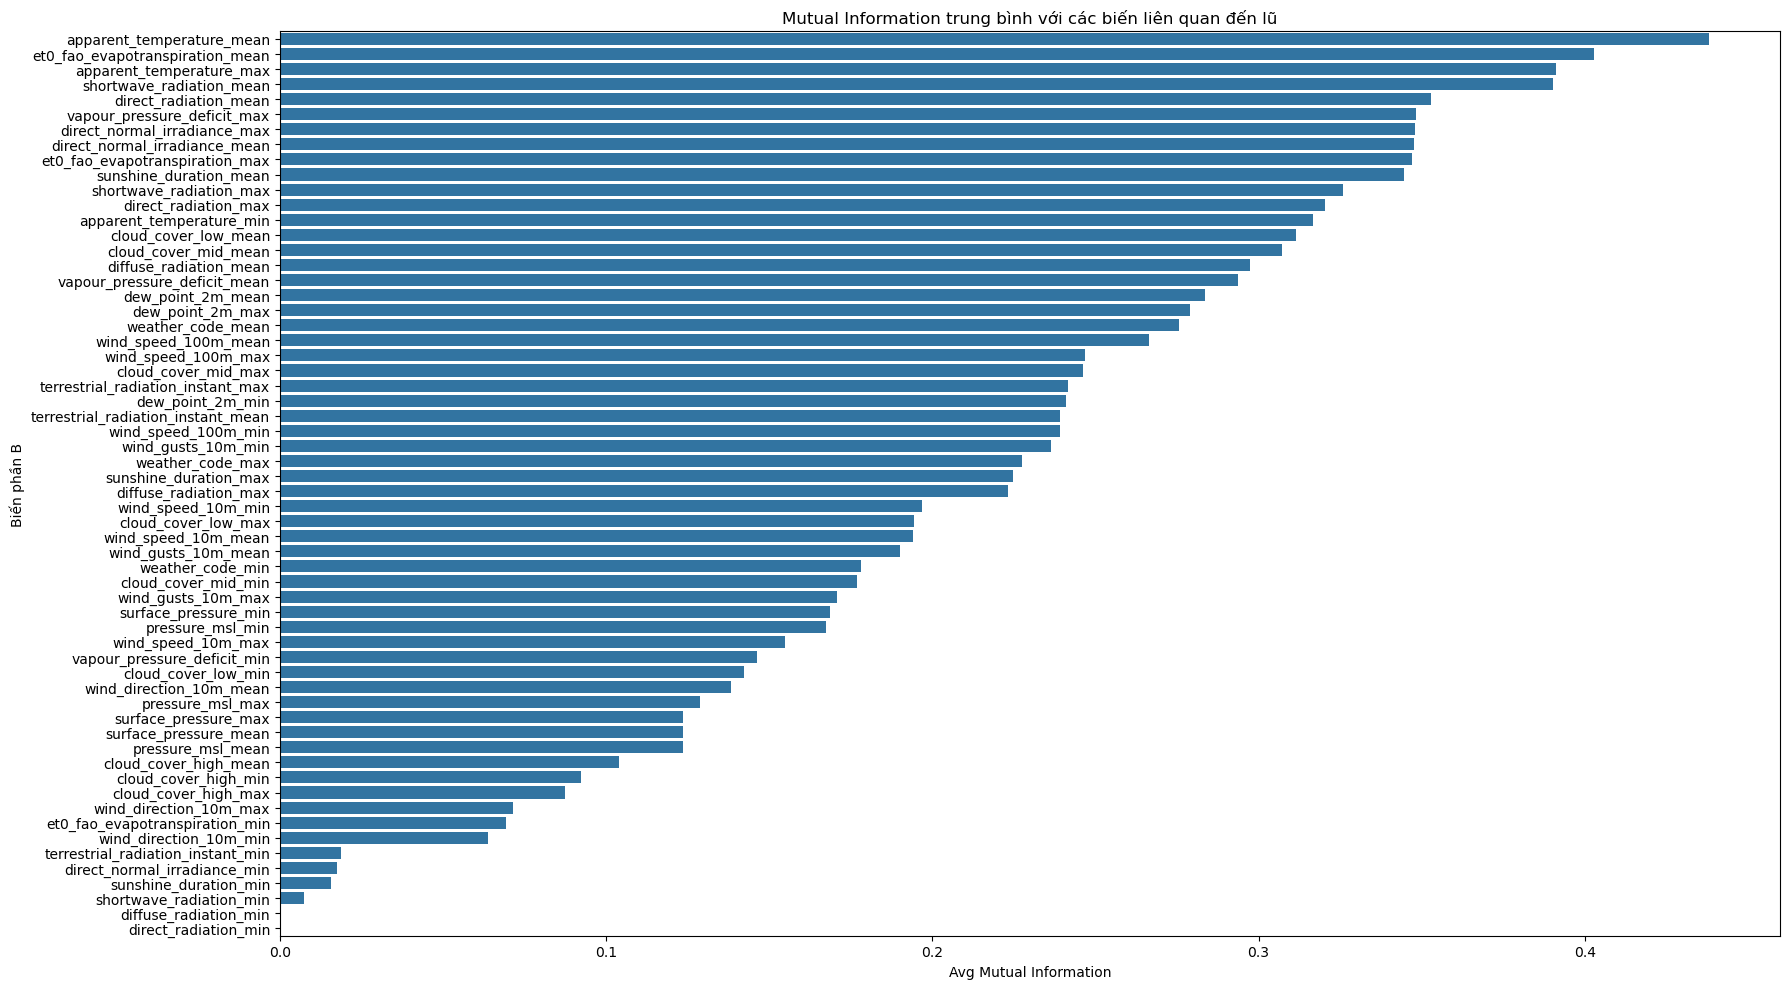

In [132]:
plt.figure(figsize=(18, 10))
sns.barplot(data=mi_df_sorted.reset_index(), x="avg_mi", y="index")
plt.title("Mutual Information trung bình với các biến liên quan đến lũ")
plt.xlabel("Avg Mutual Information")
plt.ylabel("Biến phần B")
plt.tight_layout()
plt.show()

In [133]:
df = pd.read_csv("22days_of_flood.csv")

flood_related_cols = [
    'temperature_2m_mean','temperature_2m_min', 'temperature_2m_max', 'precipitation_mean', 'precipitation_min', 'precipitation_max', 'rain_mean', 'rain_min', 'rain_max', 'showers_mean', 'showers_min',
    'showers_max', 'relative_humidity_2m_min', 'relative_humidity_2m_max', 
    'relative_humidity_2m_mean', 'cloud_cover_mean', 'cloud_cover_min', 'cloud_cover_max'
]

df_numerical = df.select_dtypes(include=["number"])
print(len(df_numerical))
# Lọc lại phần A và B
A = [col for col in flood_related_cols if col in df_numerical.columns]
B = [col for col in df_numerical.columns if col not in A]

# Bước 3: Tính ma trận tương quan
corr_matrix = df_numerical.corr()

# Ma trận tương quan A ↔ A
corr_AA = corr_matrix.loc[A, A]

# Ma trận tương quan A ↔ B
corr_AB = corr_matrix.loc[A, B]

# In ra
print("🔷 Tương quan giữa các biến trong phần A:")
display(corr_AA)

print("\n🔶 Tương quan giữa các biến phần A với phần B:")
display(corr_AB)

23
🔷 Tương quan giữa các biến trong phần A:


,temperature_2m_mean,temperature_2m_min,temperature_2m_max,precipitation_mean,precipitation_min,precipitation_max,rain_mean,rain_min,rain_max,showers_mean,showers_min,showers_max,relative_humidity_2m_min,relative_humidity_2m_max,relative_humidity_2m_mean,cloud_cover_mean,cloud_cover_min,cloud_cover_max
temperature_2m_mean,1.000000,0.916302,0.972945,-0.706751,-0.448102,-0.544050,-0.706751,-0.448102,-0.544050,NaN,NaN,NaN,-0.573053,0.658443,-0.307768,-0.471522,-0.653496,-0.147398
temperature_2m_min,0.916302,1.000000,0.835513,-0.497909,-0.274943,-0.292958,-0.497909,-0.274943,-0.292958,NaN,NaN,NaN,-0.260888,0.770402,0.040043,-0.397715,-0.548920,-0.116857
temperature_2m_max,0.972945,0.835513,1.000000,-0.798438,-0.558186,-0.654906,-0.798438,-0.558186,-0.654906,NaN,NaN,NaN,-0.665169,0.631339,-0.376107,-0.499870,-0.680033,-0.130682
precipitation_mean,-0.706751,-0.497909,-0.798438,1.000000,0.763933,0.913899,1.000000,0.763933,0.913899,NaN,NaN,NaN,0.666546,-0.473608,0.448591,0.436571,0.520591,0.177083
precipitation_min,-0.448102,-0.274943,-0.558186,0.763933,1.000000,0.714943,0.763933,1.000000,0.714943,NaN,NaN,NaN,0.661097,-0.289671,0.426868,0.329990,0.393148,0.138536
precipitation_max,-0.544050,-0.292958,-0.654906,0.913899,0.714943,1.000000,0.913899,0.714943,1.000000,NaN,NaN,NaN,0.647092,-0.330967,0.504464,0.404648,0.434660,0.208337
rain_mean,-0.706751,-0.497909,-0.798438,1.000000,0.763933,0.913899,1.000000,0.763933,0.913899,NaN,NaN,NaN,0.666546,-0.473608,0.448591,0.436571,0.520591,0.177083
rain_min,-0.448102,-0.274943,-0.558186,0.763933,1.000000,0.714943,0.763933,1.000000,0.714943,NaN,NaN,NaN,0.661097,-0.289671,0.426868,0.329990,0.393148,0.138536
rain_max,-0.544050,-0.292958,-0.654906,0.913899,0.714943,1.000000,0.913899,0.714943,1.000000,NaN,NaN,NaN,0.647092,-0.330967,0.504464,0.404648,0.434660,0.208337
showers_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



🔶 Tương quan giữa các biến phần A với phần B:


,dew_point_2m_min,dew_point_2m_mean,dew_point_2m_max,apparent_temperature_min,apparent_temperature_mean,apparent_temperature_max,weather_code_min,weather_code_mean,weather_code_max,pressure_msl_min,...,diffuse_radiation_max,direct_normal_irradiance_min,direct_normal_irradiance_mean,direct_normal_irradiance_max,terrestrial_radiation_instant_min,terrestrial_radiation_instant_mean,terrestrial_radiation_instant_max,sunshine_duration_min,sunshine_duration_mean,sunshine_duration_max
temperature_2m_mean,0.893097,0.916670,0.924591,0.947747,0.973890,0.966312,-0.516264,-0.782139,-0.468021,-0.695022,...,0.305321,NaN,0.888382,0.900624,NaN,0.927789,0.931359,NaN,0.900949,0.866055
temperature_2m_min,0.966928,0.976741,0.959962,0.950866,0.893276,0.847787,-0.290637,-0.496783,-0.220095,-0.461079,...,0.327214,NaN,0.691965,0.744102,NaN,0.833410,0.840827,NaN,0.771470,0.807983
temperature_2m_max,0.836721,0.859126,0.874090,0.913731,0.969705,0.986808,-0.577635,-0.833849,-0.471956,-0.736710,...,0.395514,NaN,0.918105,0.939633,NaN,0.897541,0.899318,NaN,0.930440,0.903925
precipitation_mean,-0.554870,-0.551843,-0.591859,-0.694396,-0.772830,-0.789417,0.764428,0.773448,0.398938,0.747147,...,-0.651373,NaN,-0.702022,-0.766662,NaN,-0.615169,-0.615606,NaN,-0.742577,-0.835411
precipitation_min,-0.274464,-0.292246,-0.338808,-0.489492,-0.535238,-0.544092,0.759236,0.592762,0.252572,0.447396,...,-0.572435,NaN,-0.499719,-0.559972,NaN,-0.402046,-0.401077,NaN,-0.547344,-0.648870
precipitation_max,-0.333777,-0.357357,-0.415397,-0.496840,-0.609614,-0.653010,0.669520,0.713831,0.442232,0.692374,...,-0.467784,NaN,-0.653848,-0.689325,NaN,-0.495906,-0.493193,NaN,-0.642948,-0.685988
rain_mean,-0.554870,-0.551843,-0.591859,-0.694396,-0.772830,-0.789417,0.764428,0.773448,0.398938,0.747147,...,-0.651373,NaN,-0.702022,-0.766662,NaN,-0.615169,-0.615606,NaN,-0.742577,-0.835411
rain_min,-0.274464,-0.292246,-0.338808,-0.489492,-0.535238,-0.544092,0.759236,0.592762,0.252572,0.447396,...,-0.572435,NaN,-0.499719,-0.559972,NaN,-0.402046,-0.401077,NaN,-0.547344,-0.648870
rain_max,-0.333777,-0.357357,-0.415397,-0.496840,-0.609614,-0.653010,0.669520,0.713831,0.442232,0.692374,...,-0.467784,NaN,-0.653848,-0.689325,NaN,-0.495906,-0.493193,NaN,-0.642948,-0.685988
showers_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


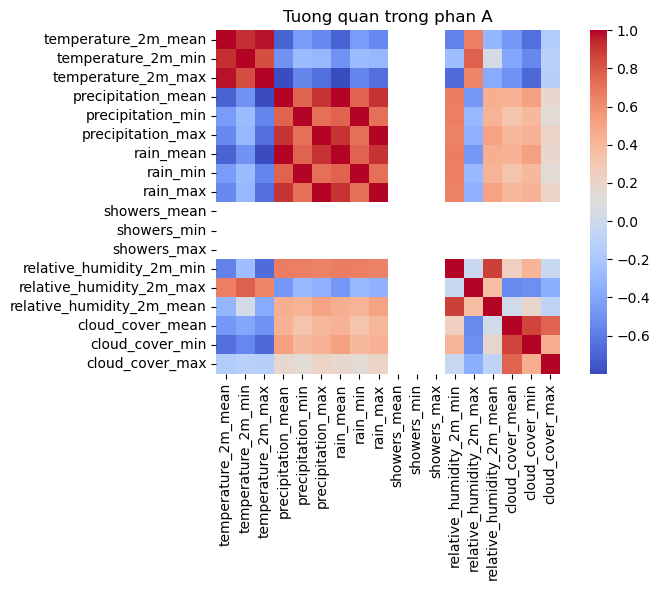

In [134]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_AA, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Tuong quan trong phan A")
plt.tight_layout()
plt.show()

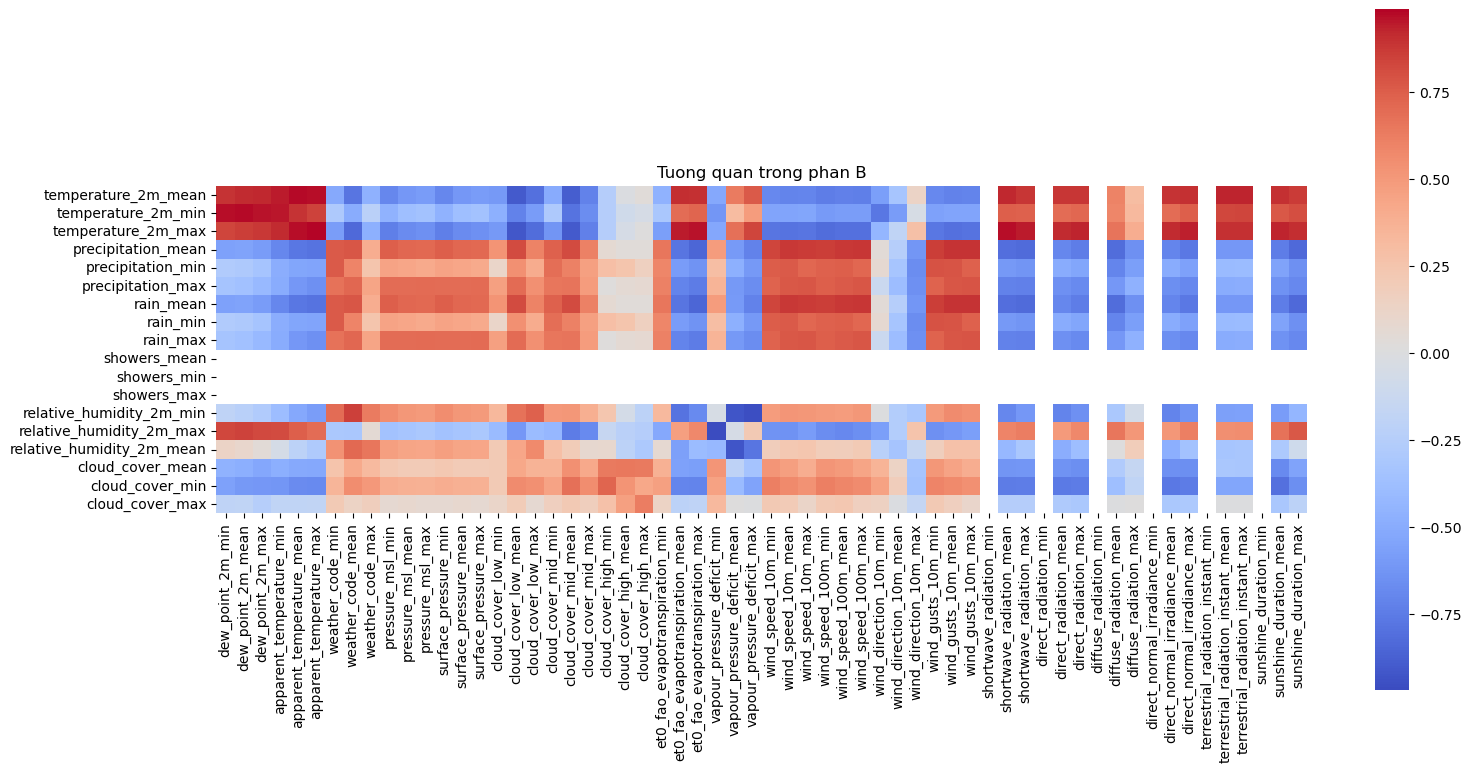

In [135]:
plt.figure(figsize=(16, 8))
sns.heatmap(corr_AB, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Tuong quan trong phan B")
plt.tight_layout()
plt.show()

In [136]:
df = pd.read_csv("22days_of_flood.csv")
all_columns = set(df.columns)
part_a = set(flood_related_cols)
part_b = list(all_columns - part_a)

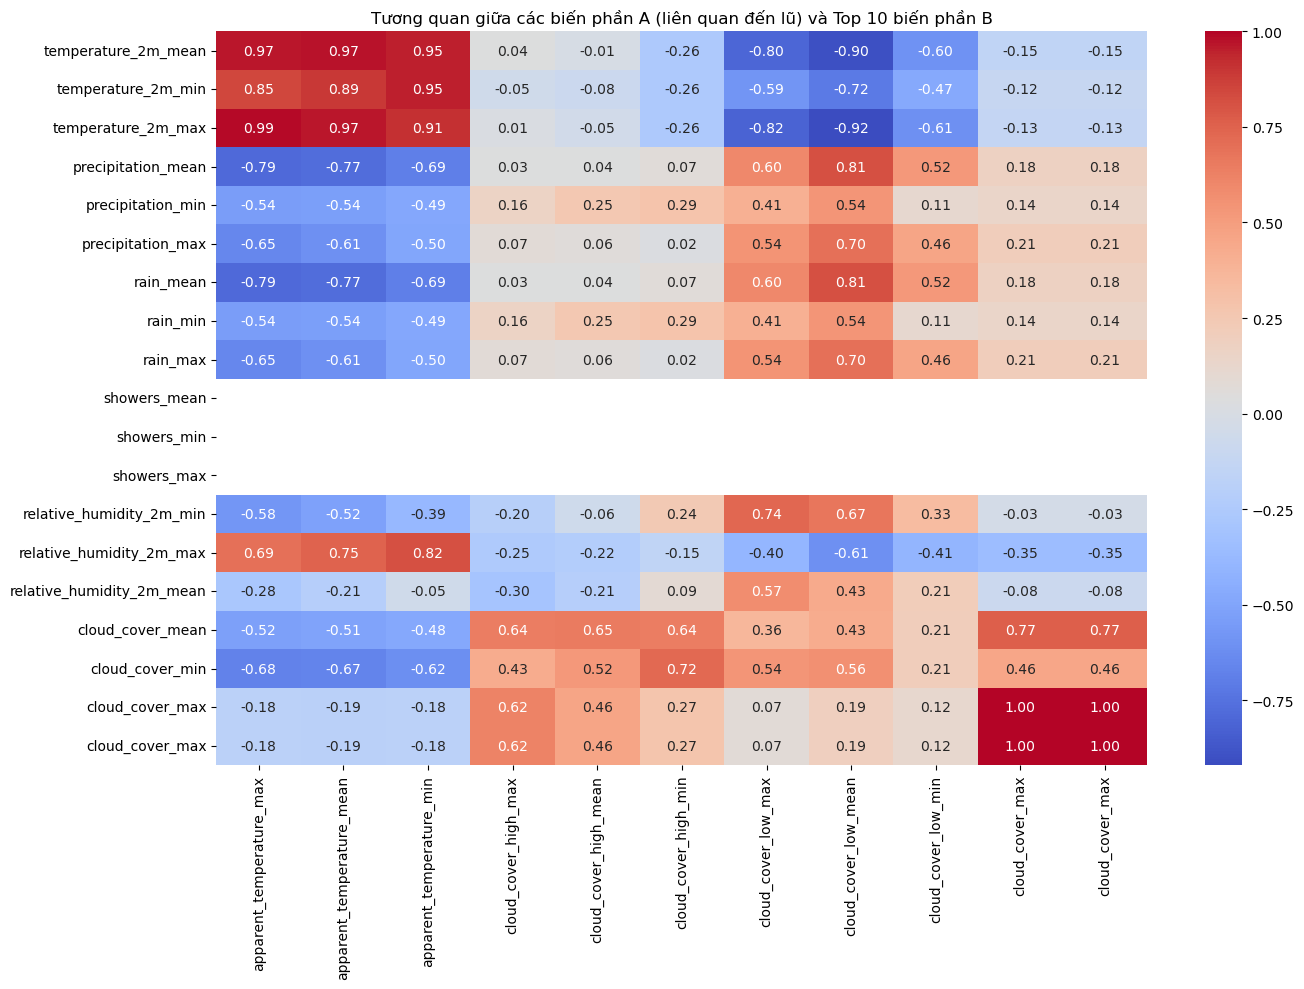

In [137]:
corr_matrix = df[flood_related_cols].corrwith(df[part_b], axis=0).abs()

top_10_corr = corr_matrix.sort_values(ascending=False).head(10)

top_10_vars = top_10_corr.index.tolist()
corr_heatmap = df[flood_related_cols + top_10_vars].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_heatmap.loc[flood_related_cols, top_10_vars], annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Tương quan giữa các biến phần A (liên quan đến lũ) và Top 10 biến phần B")
plt.tight_layout()
plt.show()

In [138]:
print(top_10_vars)

['apparent_temperature_max', 'apparent_temperature_mean', 'apparent_temperature_min', 'cloud_cover_high_max', 'cloud_cover_high_mean', 'cloud_cover_high_min', 'cloud_cover_low_max', 'cloud_cover_low_mean', 'cloud_cover_low_min', 'cloud_cover_max']


In [139]:
# Lọc các cột trong phần B có kiểu dữ liệu số
part_b_numeric = [col for col in part_b if pd.api.types.is_numeric_dtype(df[col])]

# Tính tương quan trung bình giữa mỗi cột B numeric với toàn bộ các cột A
mean_corrs = {}

for col_b in part_b_numeric:
    correlations = df[flood_related_cols].corrwith(df[col_b])
    mean_corrs[col_b] = correlations.abs().mean()

# Đưa vào DataFrame và lọc theo ngưỡng tương quan trung bình > 0.6
mean_corrs_df = pd.DataFrame.from_dict(mean_corrs, orient='index', columns=['mean_corr_with_A'])
mean_corrs_df_sorted = mean_corrs_df.sort_values(by='mean_corr_with_A', ascending=False)
selected_features = mean_corrs_df_sorted[mean_corrs_df_sorted['mean_corr_with_A'] > 0.6]

selected_features


C:\Users\PC\anaconda3\envs\BASIC_VENV\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\PC\anaconda3\envs\BASIC_VENV\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\PC\anaconda3\envs\BASIC_VENV\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\PC\anaconda3\envs\BASIC_VENV\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\PC\anaconda3\envs\BASIC_VENV\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\PC\anaconda3\envs\BASIC_VENV\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c

,mean_corr_with_A
shortwave_radiation_mean,0.682823
et0_fao_evapotranspiration_max,0.679803
shortwave_radiation_max,0.673790
et0_fao_evapotranspiration_mean,0.667601
direct_normal_irradiance_max,0.661438
sunshine_duration_mean,0.654835
direct_radiation_max,0.652298
apparent_temperature_max,0.647140
cloud_cover_mid_mean,0.643141
direct_normal_irradiance_mean,0.642640


In [140]:
# Tính ma trận tương quan giữa các cột trong phần A với các cột đã được chọn từ phần B (tương quan trung bình > 0.6)
selected_cols_b = selected_features.index.tolist()
corr_matrix_ab = df[flood_related_cols + selected_cols_b].corr()

# Trích xuất ma trận con: A (hàng) x B (cột)
corr_submatrix = corr_matrix_ab.loc[flood_related_cols, selected_cols_b].abs()

# Tính số lượng biến B có tương quan > 0.6 với từng biến A
strong_corr_counts = (corr_submatrix > 0.4).sum(axis=1)
print(strong_corr_counts)
# Tìm biến A có nhiều liên hệ mạnh nhất với các biến B
most_connected_feature = strong_corr_counts.idxmax()
most_connected_feature, strong_corr_counts[most_connected_feature]


temperature_2m_mean          24
temperature_2m_min           24
temperature_2m_max           24
precipitation_mean           24
precipitation_min            24
precipitation_max            24
rain_mean                    24
rain_min                     24
rain_max                     24
showers_mean                  0
showers_min                   0
showers_max                   0
relative_humidity_2m_min     24
relative_humidity_2m_max     23
relative_humidity_2m_mean     7
cloud_cover_mean             22
cloud_cover_min              24
cloud_cover_max               0
dtype: int64


('temperature_2m_mean', np.int64(24))

Biến A có tương quan trung bình > 0.4 với các biến B:
['temperature_2m_mean', 'temperature_2m_min', 'temperature_2m_max', 'precipitation_mean', 'precipitation_min', 'precipitation_max', 'rain_mean', 'rain_min', 'rain_max', 'relative_humidity_2m_min', 'relative_humidity_2m_max', 'cloud_cover_mean', 'cloud_cover_min']


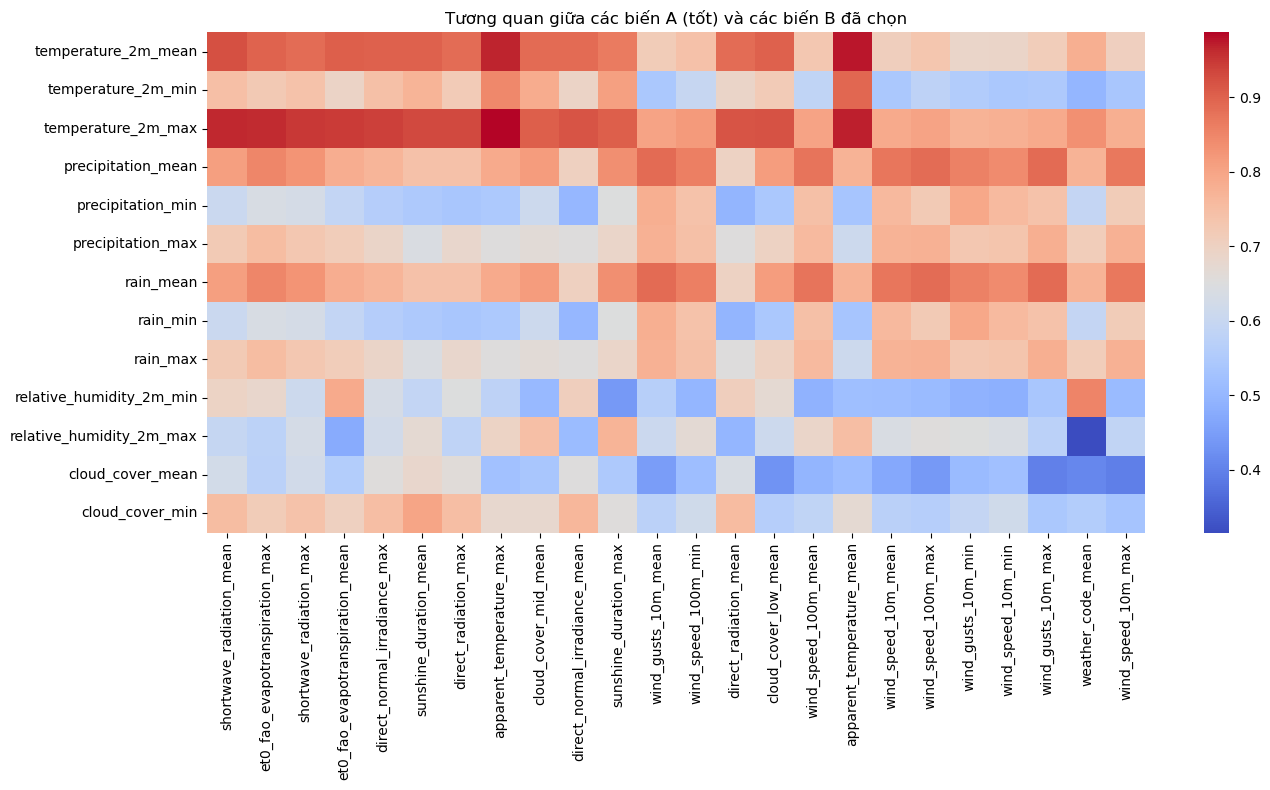

In [141]:
selected_cols_b = selected_features.index.tolist()

# Tính ma trận tương quan giữa phần A và phần B đã chọn
corr_matrix_ab = df[flood_related_cols + selected_cols_b].corr()

# Lấy ma trận con: hàng là A, cột là B
corr_submatrix = corr_matrix_ab.loc[flood_related_cols, selected_cols_b].abs()

# Tính trung bình tương quan của mỗi biến A với các biến B
mean_corrs_A = corr_submatrix.mean(axis=1)

# Lọc ra những biến A có trung bình tương quan > 0.4
good_A_features = mean_corrs_A[mean_corrs_A > 0.4].index.tolist()

# In danh sách biến A mạnh
print("Biến A có tương quan trung bình > 0.4 với các biến B:")
print(good_A_features)

# Vẽ heatmap các biến A được chọn với các biến B
plt.figure(figsize=(14, 8))
sns.heatmap(corr_submatrix.loc[good_A_features], cmap="coolwarm", fmt=".2f")
plt.title("Tương quan giữa các biến A (tốt) và các biến B đã chọn")
plt.tight_layout()
plt.show()
